# EDA (EXPLORATORY DATA ANALYSIS)

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
file_path = 'D:/DataScience Project/marketing_campaign1.xlsx'
data = pd.read_excel(file_path)

print(data.head())                                 

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0

In [11]:
# handling missing Values
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [12]:
data = data.dropna()
data.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [13]:
# Duplicate Rows
data.duplicated().sum()

0

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-null   i

In [15]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

In [16]:
print("The newest customer's enrolment date in the records:", max(data['Dt_Customer']))
print("The oldest customer's enrolment date in the records:", min(data['Dt_Customer']))

The newest customer's enrolment date in the records: 2014-06-29 00:00:00
The oldest customer's enrolment date in the records: 2012-07-30 00:00:00


In [17]:
# Extracting Age W.R.T year_Birth
data['Age'] = 2015 - data['Year_Birth']
#print(data['Age'])

In [18]:
# creating a feature spent to indicate total amt spend by customers in various categories
data['Spent'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']

In [19]:
# living with feature to indicate maritial status
data['Living_With'] = data['Marital_Status'].replace({'Married':'Partner', 'Together':'Partner', 'Absurd':'Alone', 'Widow':'Alone', 'YOLO':'Alone', 'Divorced':'Alone', 'Single':'Alone'})

In [20]:
# Children feature to categorize kids and teenagers
data['Children'] = data['Kidhome'] + data['Teenhome']

In [21]:
# Family size
data['Family_Size'] = data['Living_With'].replace({'Alone': 1, 'Partner':2}) + data['Children']

C:\Users\Asus\AppData\Local\Temp\ipykernel_15888\3644473707.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Family_Size'] = data['Living_With'].replace({'Alone': 1, 'Partner':2}) + data['Children']


In [22]:
# parenthood status
data['Is_Parent'] = np.where(data.Children > 0, 1, 0)

In [23]:
# segmenting Education levels in 3 groups
data['Education'] = data['Education'].replace({'Basic':'Undergraduate', '2n Cycle':'Undergraduate', 'Graduation':'Graduate', 'Master':'Postgraduate', 'PhD':'Postgraduate'})

In [24]:
data.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Z_CostContact,Z_Revenue,Response,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,5524,1957,Graduate,Single,58138.0,0,0,2012-09-04,58,635,...,0,3,11,1,58,1617,Alone,0,1,0
1,2174,1954,Graduate,Single,46344.0,1,1,2014-03-08,38,11,...,0,3,11,0,61,27,Alone,2,3,1
2,4141,1965,Graduate,Together,71613.0,0,0,2013-08-21,26,426,...,0,3,11,0,50,776,Partner,0,2,0
3,6182,1984,Graduate,Together,26646.0,1,0,2014-02-10,26,11,...,0,3,11,0,31,53,Partner,1,3,1
4,5324,1981,Postgraduate,Married,58293.0,1,0,2014-01-19,94,173,...,0,3,11,0,34,422,Partner,1,3,1
5,7446,1967,Postgraduate,Together,62513.0,0,1,2013-09-09,16,520,...,0,3,11,0,48,716,Partner,1,3,1
6,965,1971,Graduate,Divorced,55635.0,0,1,2012-11-13,34,235,...,0,3,11,0,44,590,Alone,1,2,1
7,6177,1985,Postgraduate,Married,33454.0,1,0,2013-05-08,32,76,...,0,3,11,0,30,169,Partner,1,3,1
8,4855,1974,Postgraduate,Together,30351.0,1,0,2013-06-06,19,14,...,0,3,11,1,41,46,Partner,1,3,1
9,5899,1950,Postgraduate,Together,5648.0,1,1,2014-03-13,68,28,...,0,3,11,0,65,49,Partner,2,4,1


In [25]:
# droping rebundent columns
data.drop(['ID', 'Year_Birth', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

# ANALYSIS AND VISUALIZATIONS

In [27]:
data.shape

(2216, 30)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2216 non-null   object 
 1   Marital_Status       2216 non-null   object 
 2   Income               2216 non-null   float64
 3   Kidhome              2216 non-null   int64  
 4   Teenhome             2216 non-null   int64  
 5   Recency              2216 non-null   int64  
 6   MntWines             2216 non-null   int64  
 7   MntFruits            2216 non-null   int64  
 8   MntMeatProducts      2216 non-null   int64  
 9   MntFishProducts      2216 non-null   int64  
 10  MntSweetProducts     2216 non-null   int64  
 11  MntGoldProds         2216 non-null   int64  
 12  NumDealsPurchases    2216 non-null   int64  
 13  NumWebPurchases      2216 non-null   int64  
 14  NumCatalogPurchases  2216 non-null   int64  
 15  NumStorePurchases    2216 non-null   int64 

In [29]:
data.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.073105,0.064079,0.013538,0.009477,0.150271,46.179603,607.075361,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.260367,0.244950,0.115588,0.096907,0.357417,11.985554,602.900476,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,38.000000,69.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000,396.500000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,1048.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,122.000000,2525.000000,3.000000,5.000000,1.000000


In [30]:
data.describe(include='object').T

,count,unique,top,freq
Education,2216,3,Graduate,1116
Marital_Status,2216,8,Married,857
Living_With,2216,2,Partner,1430


# PAIR PLOT

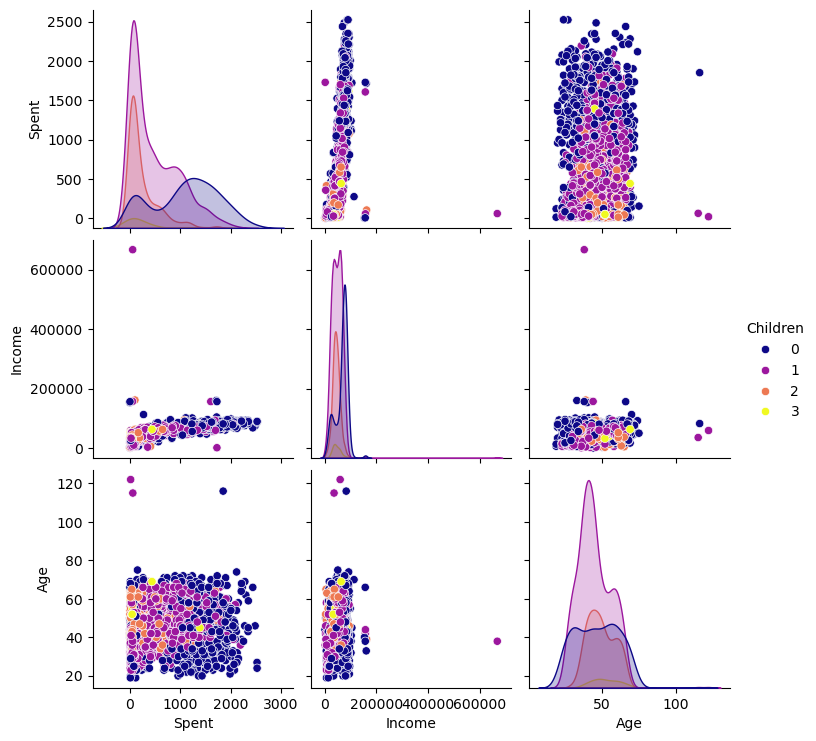

In [32]:
sns.pairplot(data , vars=['Spent','Income','Age'] , hue='Children', palette='plasma');

# SCATTER PLOTS

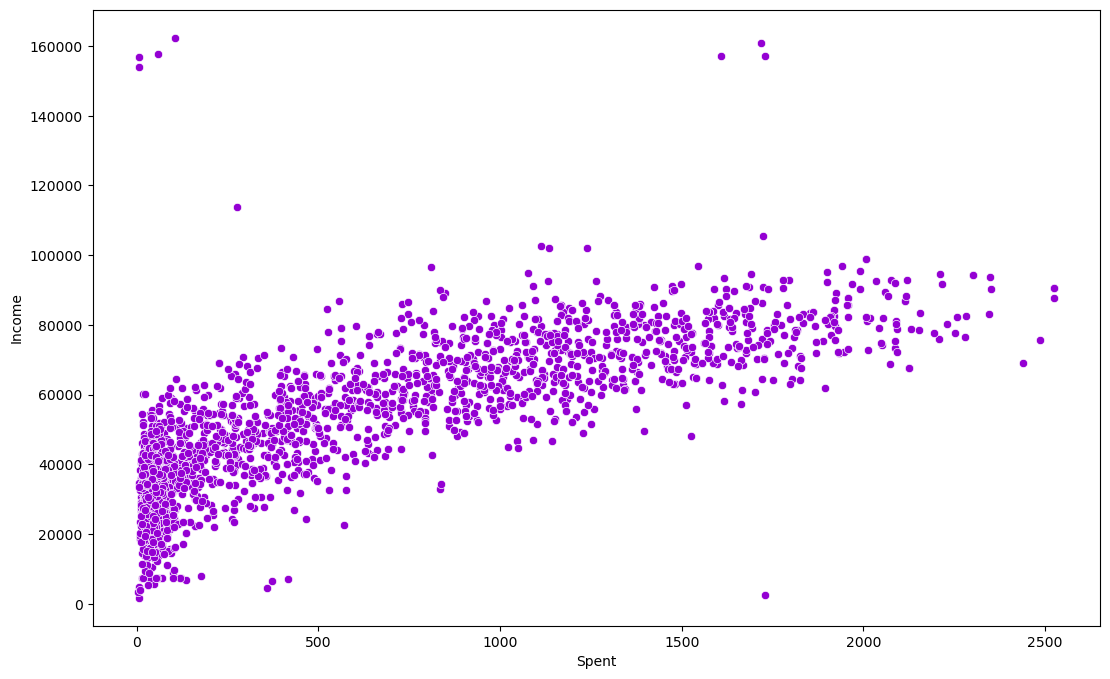

In [34]:
plt.figure(figsize=(13,8))
sns.scatterplot(x=data[data['Income']<600000]['Spent'], y=data[data['Income']<600000]['Income'], color='#9400D3');

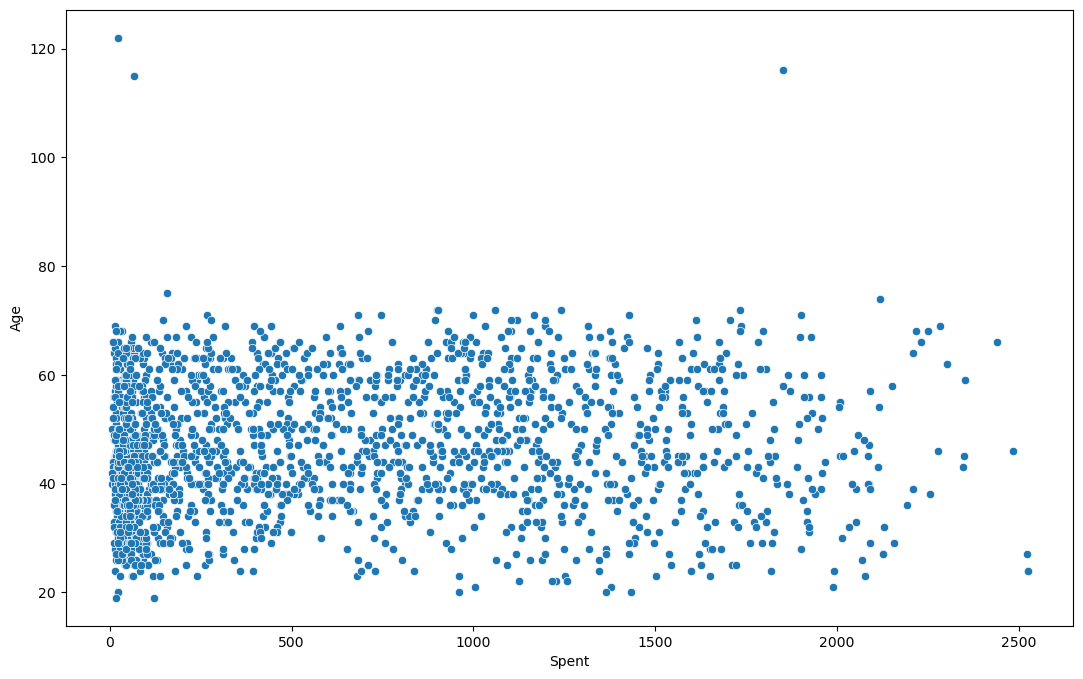

In [35]:
plt.figure(figsize=(13,8))
sns.scatterplot(x=data['Spent'], y=data['Age']);

# HISTOGRAM PLOT

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


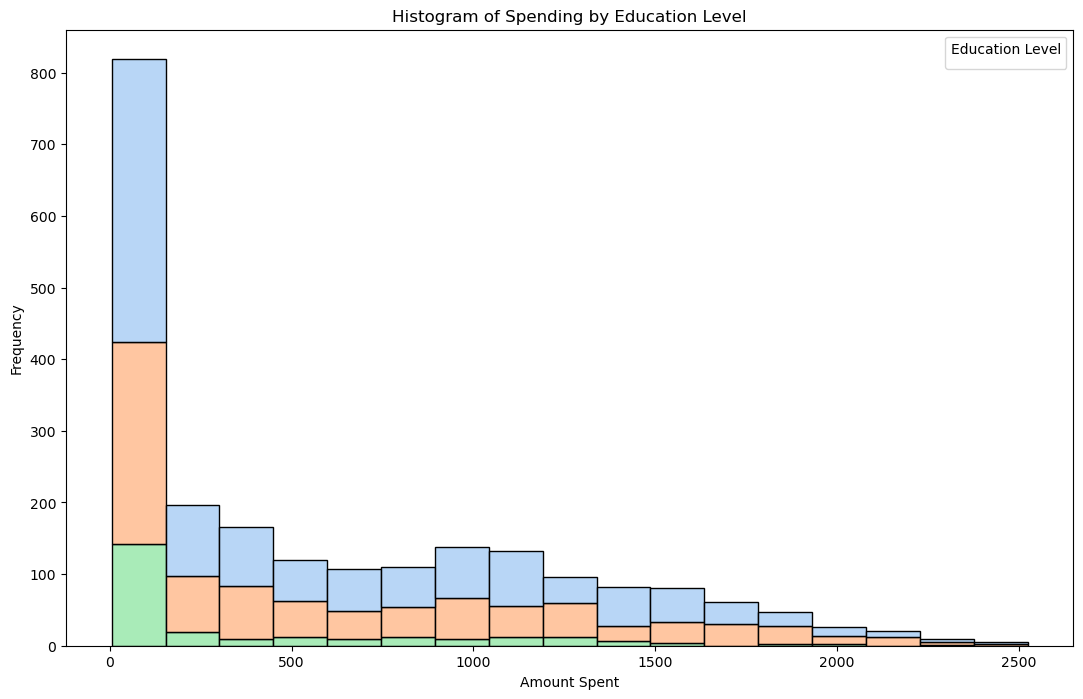

In [37]:
plt.figure(figsize=(13, 8))
sns.histplot(x=data['Spent'], hue=data['Education'], palette='pastel', multiple="stack")
plt.title('Histogram of Spending by Education Level')
plt.xlabel('Amount Spent')
plt.ylabel('Frequency')
plt.legend(title='Education Level')
plt.show()

# PIEPLOT

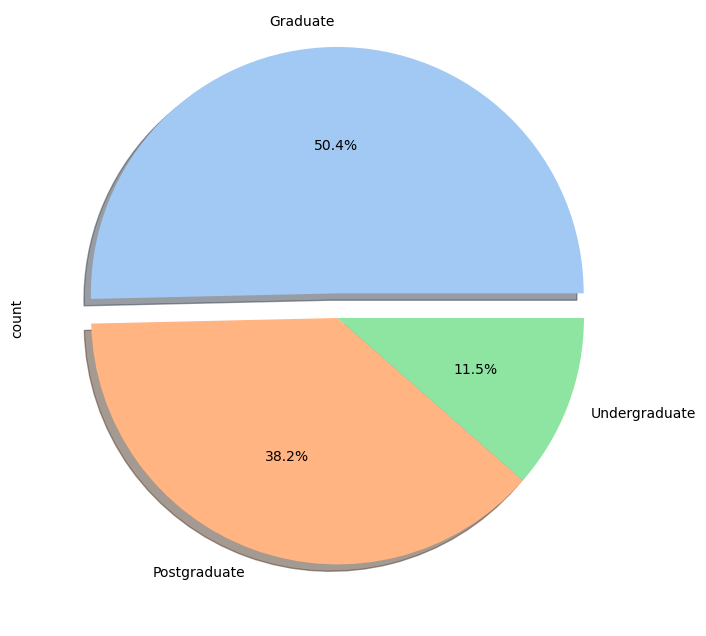

In [39]:
data['Education'].value_counts().plot.pie(explode=[0.1,0,0], autopct='%1.1f%%', shadow=True, figsize=(8,8), colors=sns.color_palette('pastel'));

In [40]:
import warnings
warnings.filterwarnings('ignore')

# Outliner Detection

# DISTRIBUTION PLOTS

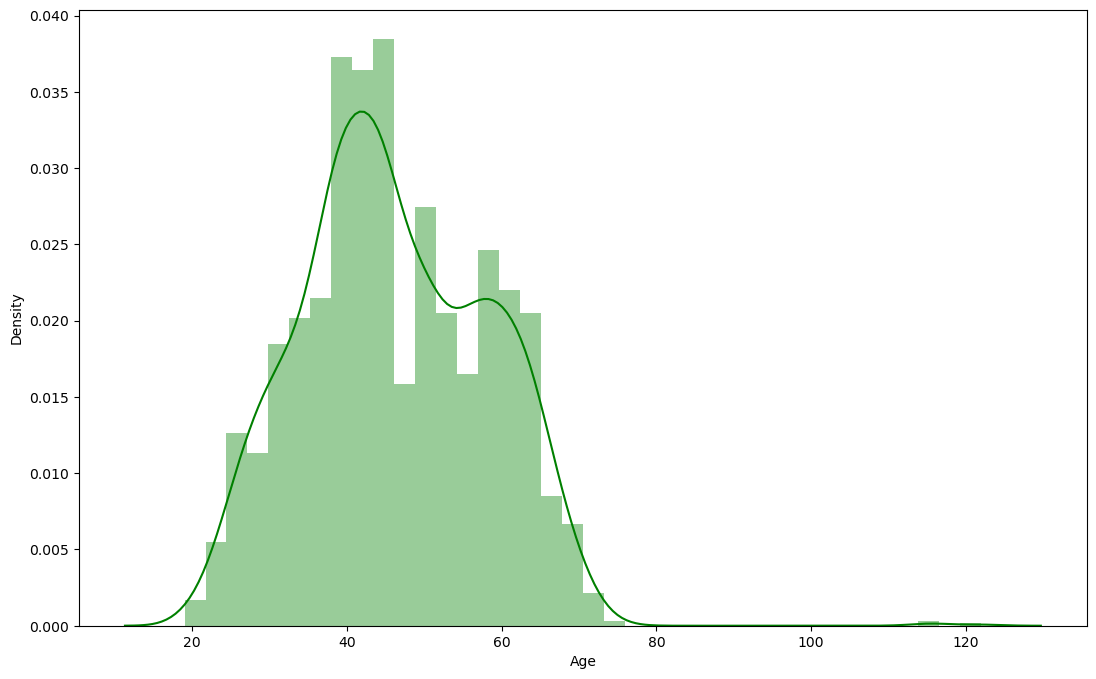

In [43]:
plt.figure(figsize=(13,8))
sns.distplot(data.Age, color='GREEN');

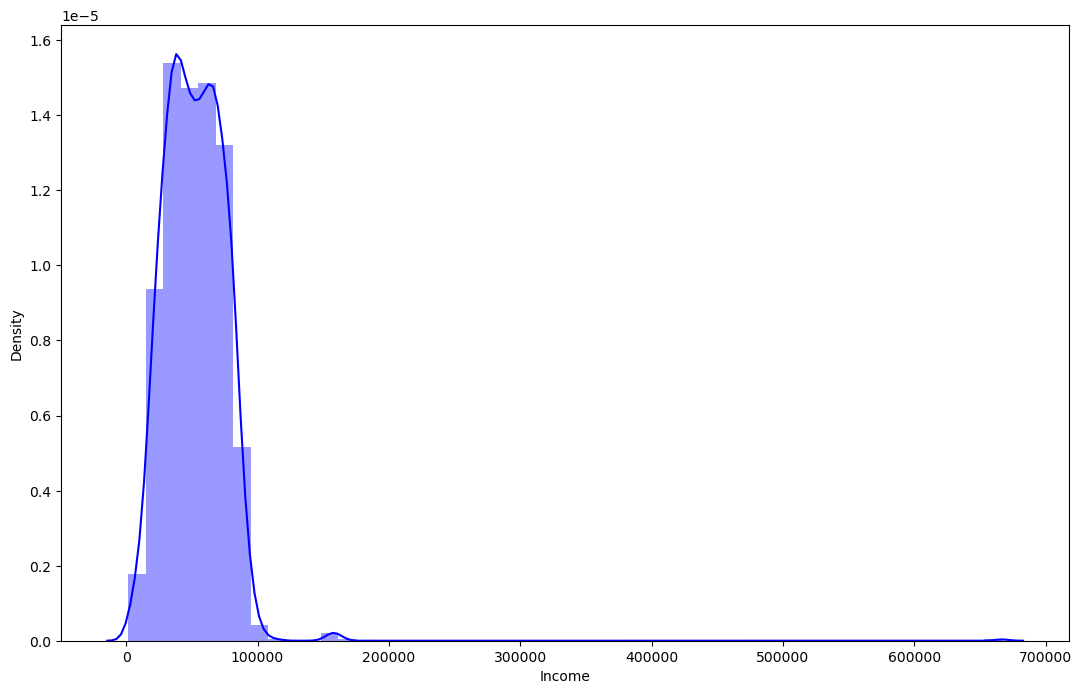

In [44]:
plt.figure(figsize=(13,8))
sns.distplot(data.Income, color='BLUE');

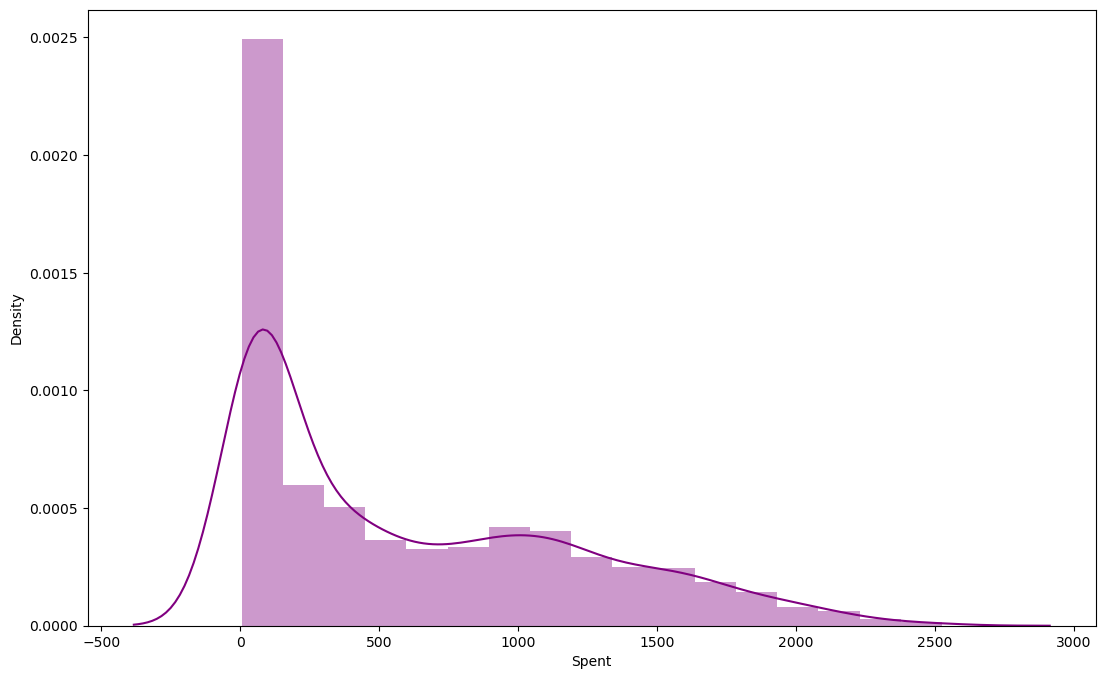

In [45]:
plt.figure(figsize=(13,8))
sns.distplot(data.Spent, color='PURPLE');

In [46]:
numerical = ['Income', 'Recency', 'Age', 'Spent']

# OUTLIERS

In [48]:
def detect_outliers(d):
  for i in d:
    Q3, Q1 = np.percentile(data[i], [75 ,25])
    IQR = Q3 - Q1

    ul = Q3+1.5*IQR
    ll = Q1-1.5*IQR

    outliers = data[i][(data[i] > ul) | (data[i] < ll)]
    print(f'*** {i} outlier points***', '\n', outliers, '\n')

In [49]:
detect_outliers(numerical)

*** Income outlier points*** 
 164     157243.0
617     162397.0
655     153924.0
687     160803.0
1300    157733.0
1653    157146.0
2132    156924.0
2233    666666.0
Name: Income, dtype: float64 

*** Recency outlier points*** 
 Series([], Name: Recency, dtype: int64) 

*** Age outlier points*** 
 192    115
239    122
339    116
Name: Age, dtype: int64 

*** Spent outlier points*** 
 1179    2525
1492    2524
1572    2525
Name: Spent, dtype: int64 



In [50]:
# DELETING OUTLINERS
data = data[(data['Age']<100)]
data = data[(data['Income']<600000)]

In [51]:
categorical = [var for var in data.columns if data[var].dtype=='O']

In [52]:
# check the number of different labels
for var in categorical:
    print(data[var].value_counts() / float(len(data)))
    print()
    print()

Education
Graduate         0.504069
Postgraduate     0.382007
Undergraduate    0.113924
Name: count, dtype: float64


Marital_Status
Married     0.387432
Together    0.258137
Single      0.212477
Divorced    0.104430
Widow       0.034358
Alone       0.001356
Absurd      0.000904
YOLO        0.000904
Name: count, dtype: float64


Living_With
Partner    0.64557
Alone      0.35443
Name: count, dtype: float64




In [53]:
categorical

['Education', 'Marital_Status', 'Living_With']

In [54]:
data['Living_With'].unique()

array(['Alone', 'Partner'], dtype=object)

In [55]:
data['Education'] = data['Education'].map({'Undergraduate':0,'Graduate':1, 'Postgraduate':2})

In [56]:
data['Living_With'] = data['Living_With'].map({'Alone':0,'Partner':1})

In [57]:
data.dtypes

Education                int64
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Response                 int64
Age                      int64
Spent                    int64
Living_With              int64
Children                 int64
Family_Size              int64
Is_Parent                int32
dtype: object

In [58]:
data.drop(['Marital_Status'], axis=1, inplace=True)

# HEATMAP

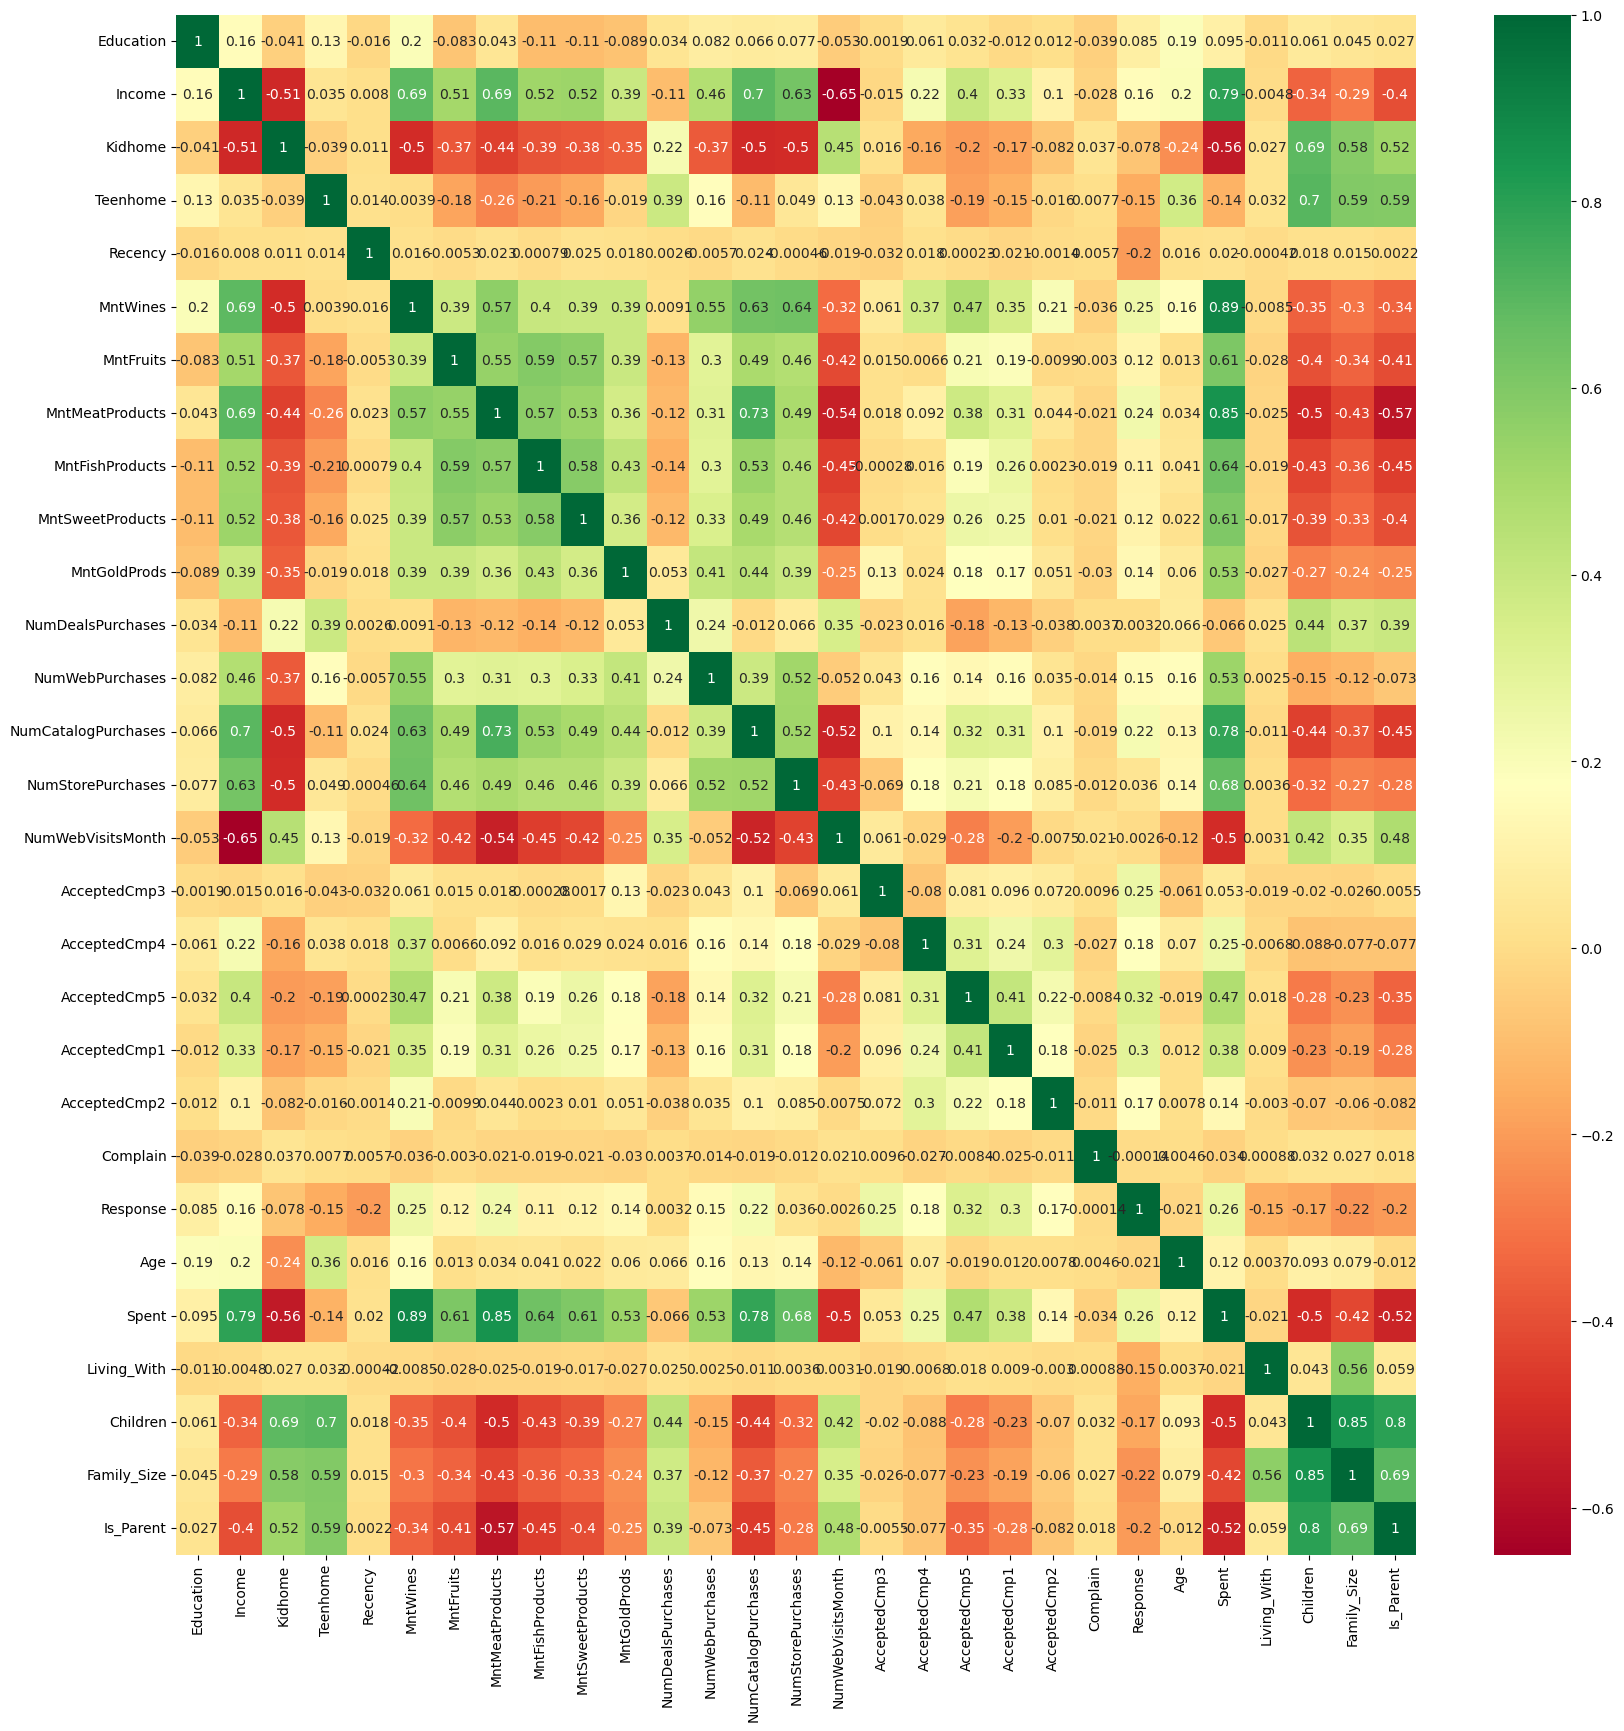

In [60]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# Feature Scaling

In [62]:
data_old = data.copy()

In [63]:
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
data = data.drop(cols_del, axis=1)

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
scaler = StandardScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)

In [66]:
data.head()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.411675,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,1.426865,2.503607,-0.555814,0.692181,1.018352,1.676245,-1.349603,-1.264598,-1.758359,-1.581139
1,-0.411675,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-1.126420,-0.571340,-1.171160,-0.132545,1.274785,-0.963297,-1.349603,1.404572,0.449070,0.632456
2,-0.411675,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,1.426865,-0.229679,1.290224,-0.544908,0.334530,0.280110,0.740959,-1.264598,-0.654644,-1.581139
3,-0.411675,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,-0.761665,-0.913000,-0.555814,0.279818,-1.289547,-0.920135,0.740959,0.069987,0.449070,0.632456
4,1.123949,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,0.332600,0.111982,0.059532,-0.132545,-1.033114,-0.307562,0.740959,0.069987,0.449070,0.632456


# Dimensionally Reduction (Machine learning technique that aims to decrease the dataset columns, while retaining most of the valuable information)

# SUPERVISED AND UNSUPERVISED MACHINE LEARNING 

# PCA (Principle Component Analysis)

In [69]:
from sklearn.decomposition import PCA

In [70]:
p = PCA(n_components=3)
p.fit(data)

PCA(n_components=3)

In [131]:
W = p.components_
W

array([[ 1.13473012e-02,  2.79487068e-01, -2.46222759e-01,
        -9.87087934e-02,  3.52657543e-03,  2.55717082e-01,
         2.38397876e-01,  2.85462066e-01,  2.48709797e-01,
         2.37301805e-01,  1.88380389e-01, -7.82601009e-02,
         1.67559771e-01,  2.77349175e-01,  2.41542834e-01,
        -2.25949430e-01,  3.84647071e-02,  3.20099415e-01,
        -2.75761972e-02, -2.48087477e-01, -2.19729533e-01,
        -2.42808178e-01],
       [ 1.40724099e-01,  1.78235479e-01,  5.22493294e-03,
         4.62107048e-01,  1.62573750e-02,  2.09383462e-01,
         1.10556735e-02,  9.91674892e-03,  2.48880290e-04,
         2.16365287e-02,  1.23085389e-01,  3.48733400e-01,
         2.96785213e-01,  1.05964524e-01,  2.05469712e-01,
         4.61018663e-02,  2.34781226e-01,  1.33706893e-01,
         1.25508841e-01,  3.39319995e-01,  3.46883320e-01,
         2.92280110e-01],
       [ 5.06792038e-01,  7.53507129e-02, -2.82880179e-01,
         1.51584362e-01, -3.59378181e-02,  1.16868188e-01,
    

In [133]:
pd.DataFrame(data = W.T, columns = ['PC1', 'PC2', 'PC3'], index = data.columns)

,PC1,PC2,PC3
Education,0.011347,0.140724,0.506792
Income,0.279487,0.178235,0.075351
Kidhome,-0.246223,0.005225,-0.282880
Teenhome,-0.098709,0.462107,0.151584
Recency,0.003527,0.016257,-0.035938
MntWines,0.255717,0.209383,0.116868
MntFruits,0.238398,0.011056,-0.254125
MntMeatProducts,0.285462,0.009917,-0.076436
MntFishProducts,0.248710,0.000249,-0.253973
MntSweetProducts,0.237302,0.021637,-0.257662


In [135]:
p.explained_variance_

array([8.27465625, 2.9209145 , 1.4306072 ])

In [137]:
p.explained_variance_ratio_

array([0.3759507 , 0.13270882, 0.0649982 ])

In [139]:
pd.DataFrame(p.explained_variance_ratio_, index=range(1,4) , columns=['Explained Variablity'])

,Explained Variablity
1,0.375951
2,0.132709
3,0.064998


In [141]:
p.explained_variance_ratio_.cumsum()

array([0.3759507 , 0.50865952, 0.57365772])

# BARPLOT 

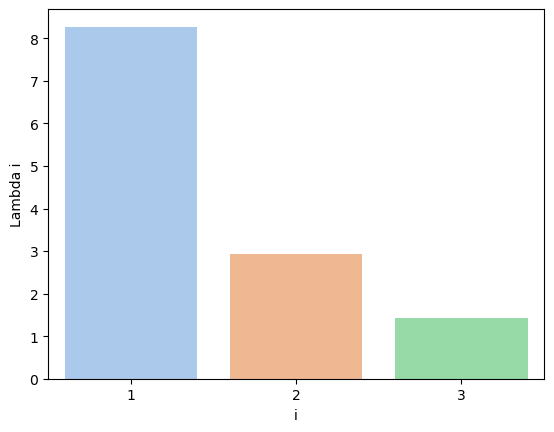

In [144]:
sns.barplot(x = list(range(1,4)), y = p.explained_variance_, palette = 'pastel')
plt.xlabel('i')
plt.ylabel('Lambda i');

In [146]:
data_pca = pd.DataFrame(p.transform(data), columns = ['PC1', 'PC2', 'PC3'])

In [148]:
data_pca.describe().T

,count,mean,std,min,25%,50%,75%,max
PC1,2212.0,-9.636656e-17,2.876570,-5.915030,-2.548037,-0.784932,2.418554,7.441146
PC2,2212.0,1.284887e-17,1.709068,-4.398452,-1.343425,-0.133318,1.243054,6.248180
PC3,2212.0,3.854662e-17,1.196080,-5.036586,-0.824163,0.015032,0.864544,3.542719


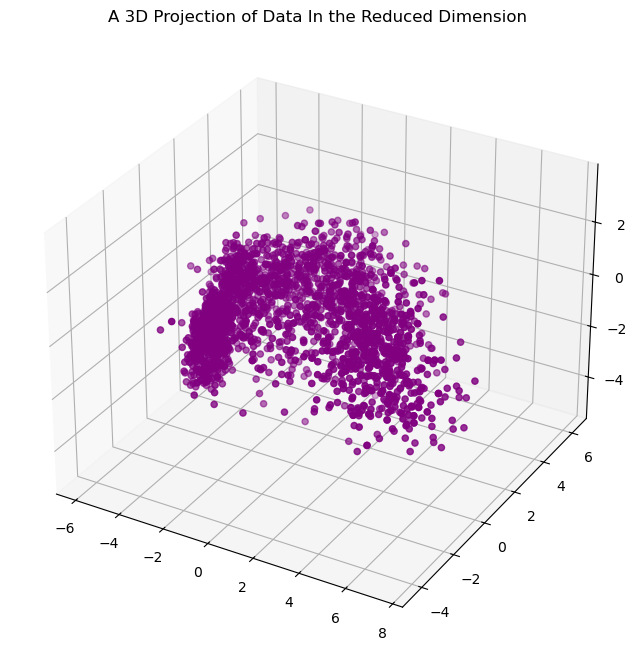

In [150]:
x = data_pca['PC1']
y = data_pca['PC2']
z = data_pca['PC3']

fig = plt.figure(figsize=(13,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z, c='purple', marker='o')
ax.set_title('A 3D Projection of Data In the Reduced Dimension')
plt.show()

# CLUSTERING 

In [162]:
pip install yellowbrick

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
   -------- ------------------------------ 61.4/282.6 kB 656.4 kB/s eta 0:00:01
   ------------ -------------------------- 92.2/282.6 kB 751.6 kB/s eta 0:00:01
   ------------------- ------------------ 143.4/282.6 kB 774.0 kB/s eta 0:00:01
   ------------------------ ------------- 184.3/282.6 kB 798.5 kB/s eta 0:00:01
   ------------------------------ ------- 225.3/282.6 kB 811.5 kB/s eta 0:00:01
   -------------------------------------  276.5/282.6 kB 853.3 kB/s eta 0:00:01
   -------------------------------------- 282.6/282.6 kB 794.1 kB/s eta 0:00:00
   ---------------------------------------- 0.0/301.8 kB ? eta -:--:--
   ----- --------------------------------- 41.0/301.8 kB 991.0 kB/s eta 0:00:01
  

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.4.2 which is incompatible.


In [164]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, AgglomerativeClustering

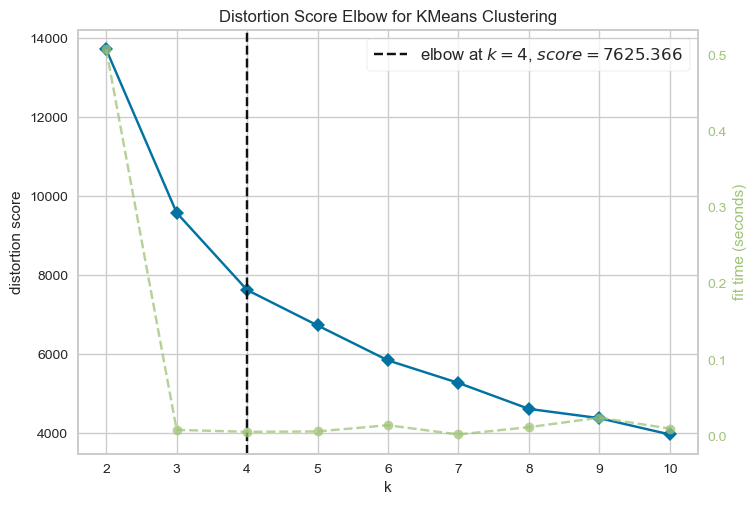

In [166]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(data_pca)
Elbow_M.show();

In [168]:
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(data_pca)
data_pca['Clusters'] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
data['Clusters'] = yhat_AC
data_old['Clusters'] = yhat_AC

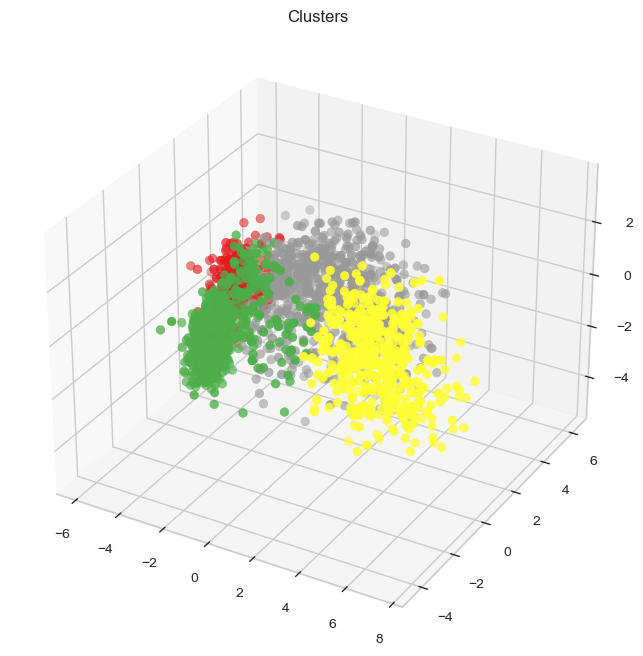

In [170]:
fig = plt.figure(figsize=(13,8))
ax = plt.subplot(111, projection='3d', label='bla')
ax.scatter(x, y, z, s=40, c=data_pca['Clusters'], marker='o', cmap='Set1_r')
ax.set_title('Clusters')
plt.show()

# Clusters Analysis and customer Profiling (Involve grouping customers based on similarities in their attributes to create meaningful segments)

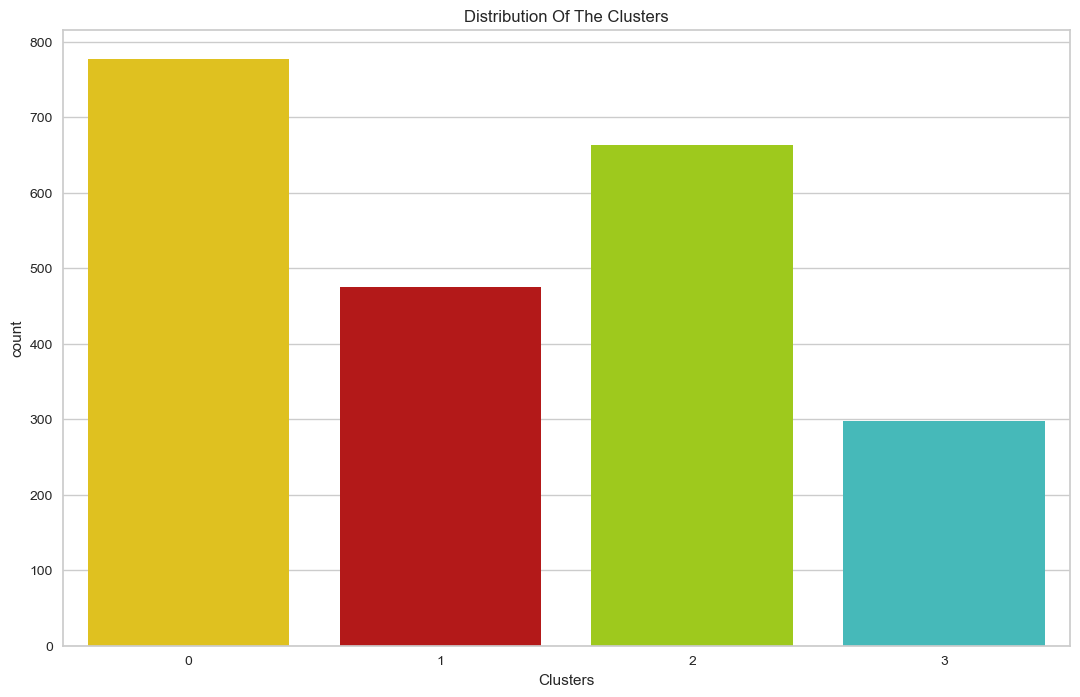

In [173]:
pal = ['gold','#cc0000', '#ace600','#33cccc']
plt.figure(figsize=(13,8))
pl = sns.countplot(x=data['Clusters'], palette= pal)
pl.set_title('Distribution Of The Clusters')
plt.show()

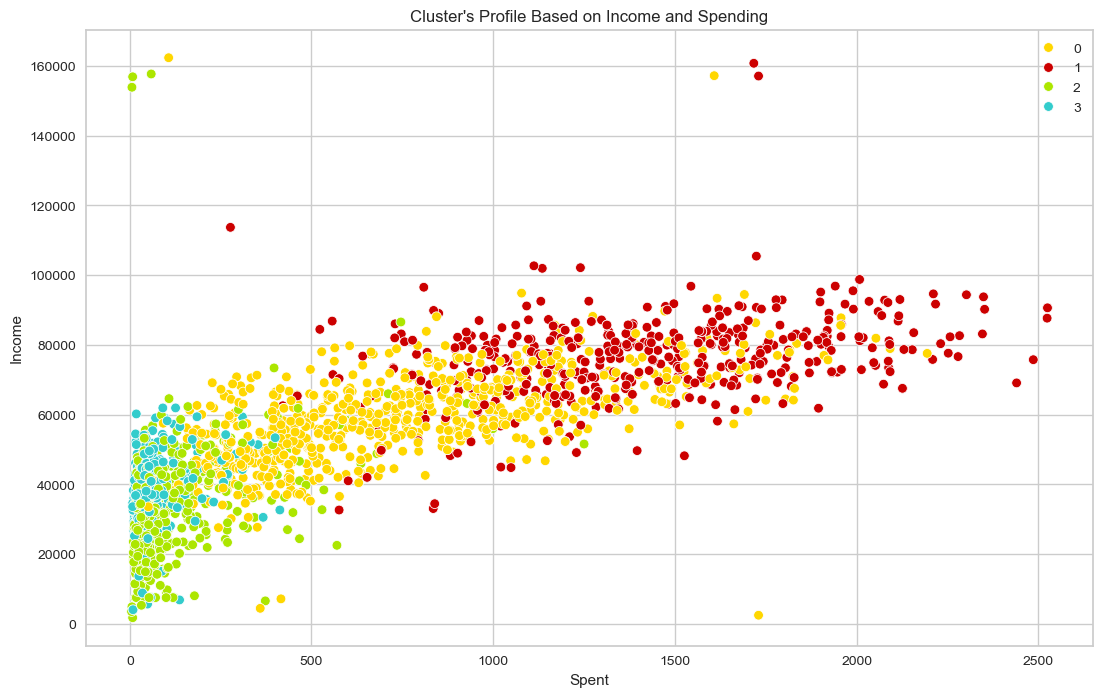

In [175]:
plt.figure(figsize=(13,8))
pl = sns.scatterplot(data=data_old, x=data_old['Spent'], y=data_old['Income'], hue=data_old['Clusters'], palette= pal)
pl.set_title("Cluster's Profile Based on Income and Spending")
plt.legend();

# Income vs spending plot shows the clusters pattern

# group 1: high spending & average income
# group 0: low spending & low income
# group 3: low spending & average income
# group 2: high spending & high income

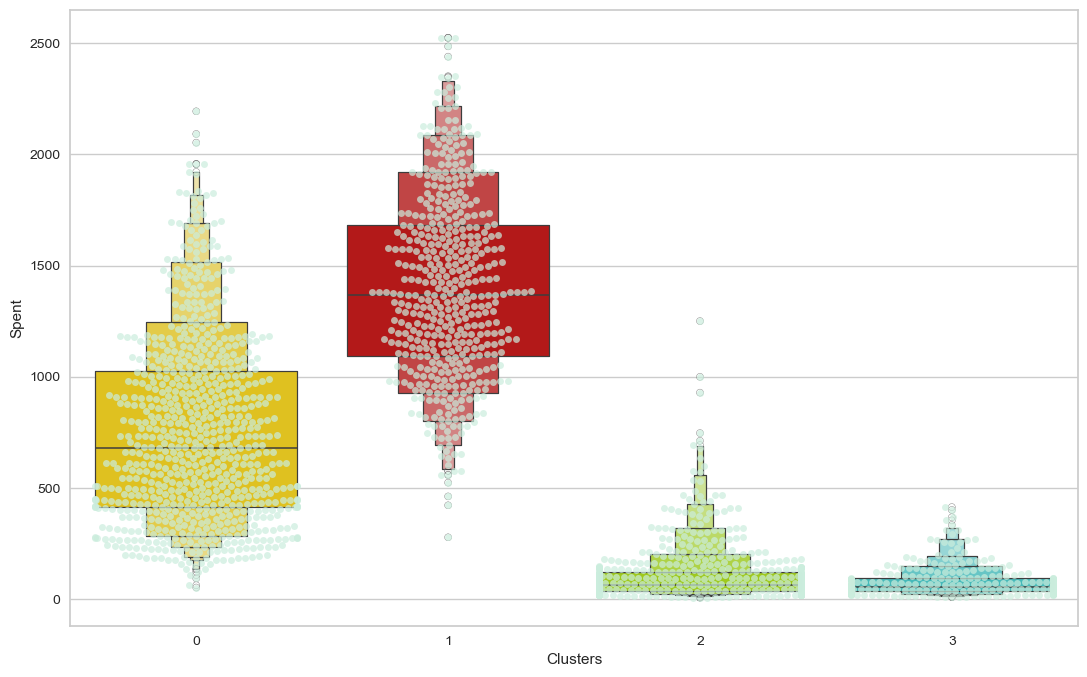

In [178]:
plt.figure(figsize=(13,8))
pl = sns.swarmplot(x=data_old['Clusters'], y=data_old['Spent'], color="#CBEDDD", alpha=0.7)
pl = sns.boxenplot(x=data_old['Clusters'], y=data_old['Spent'], palette=pal)
plt.show();

# From the above plot, it can be clearly seen that cluster 2 is our biggest set of customers closely followed by cluster 1. We can explore what each cluster is spending on for the targeted marketing strategies.

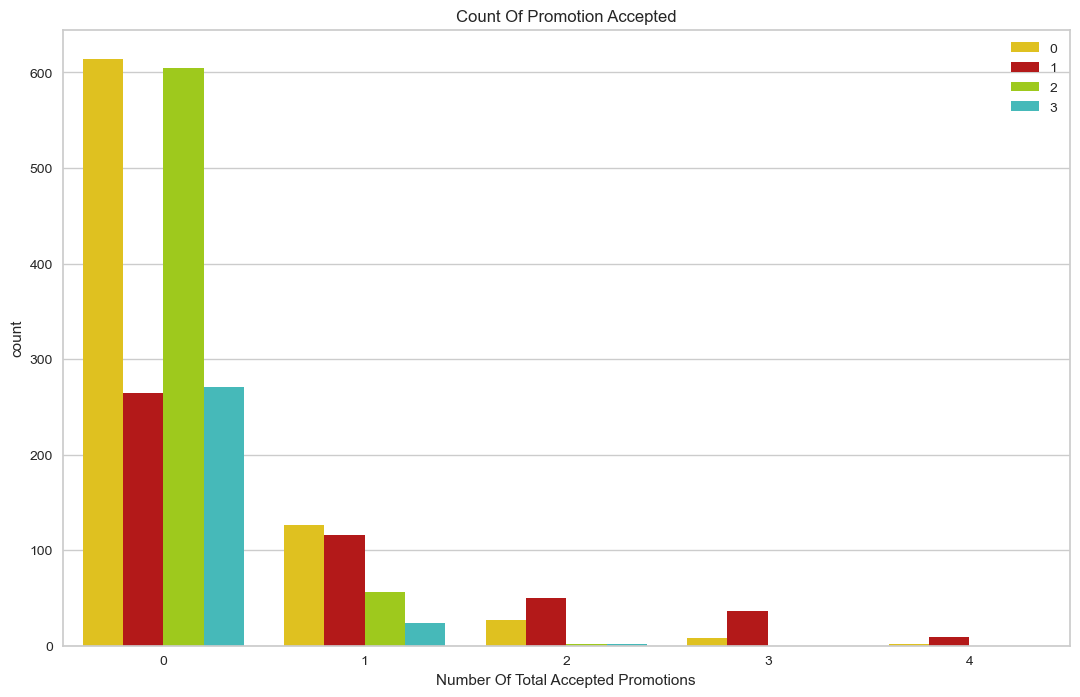

In [181]:
#Plotting count of total campaign accepted.
data_old['Total_Promos'] = data_old['AcceptedCmp1']+ data_old['AcceptedCmp2']+ data_old['AcceptedCmp3']+ data_old['AcceptedCmp4']+ data_old['AcceptedCmp5']

plt.figure(figsize=(13,8))
pl = sns.countplot(x=data_old['Total_Promos'], hue=data_old['Clusters'], palette= pal)
pl.set_title('Count Of Promotion Accepted')
pl.set_xlabel('Number Of Total Accepted Promotions')
plt.legend(loc='upper right')
plt.show();

# There has not been an overwhelming response to the campaigns so far. Very few participants overall. Moreover, no one part take in all 5 of them. Perhaps better-targeted and well-planned campaigns are required to boost sales.

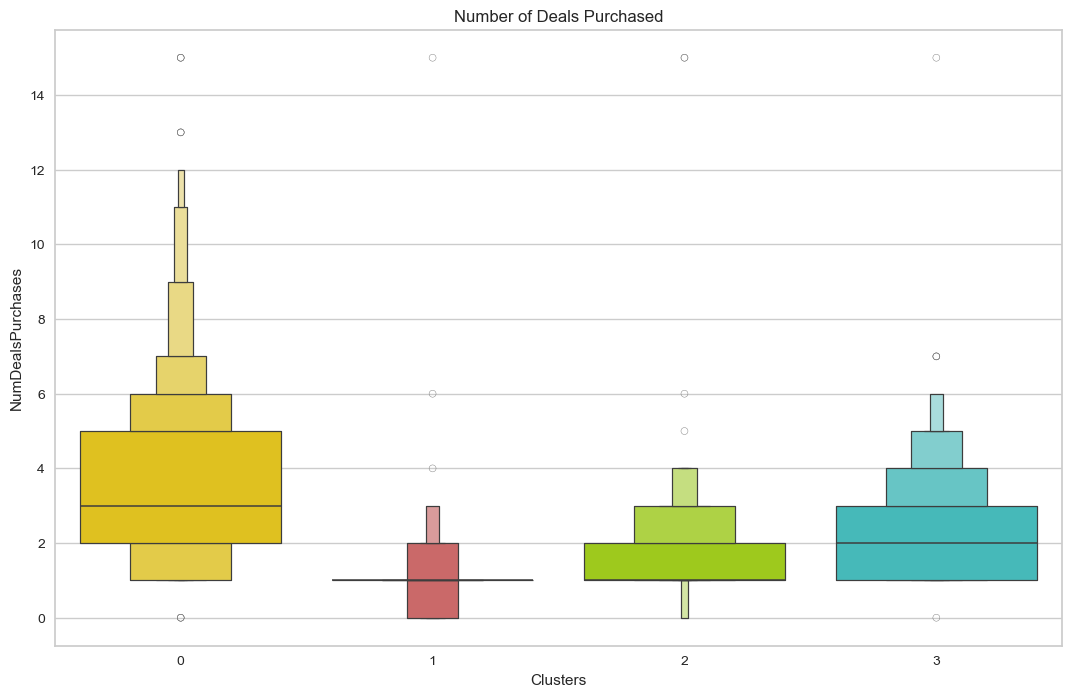

In [184]:
#Plotting the number of deals purchased
plt.figure(figsize=(13,8))
pl=sns.boxenplot(y=data_old['NumDealsPurchases'],x=data_old['Clusters'], palette= pal)
pl.set_title('Number of Deals Purchased');

# Unlike campaigns, the deals offered did well. It has best outcome with cluster 1 and cluster 3. However, our star customers cluster 2 are not much into the deals. Nothing seems to attract cluster 0 overwhelmingly

<Figure size 1300x800 with 0 Axes>

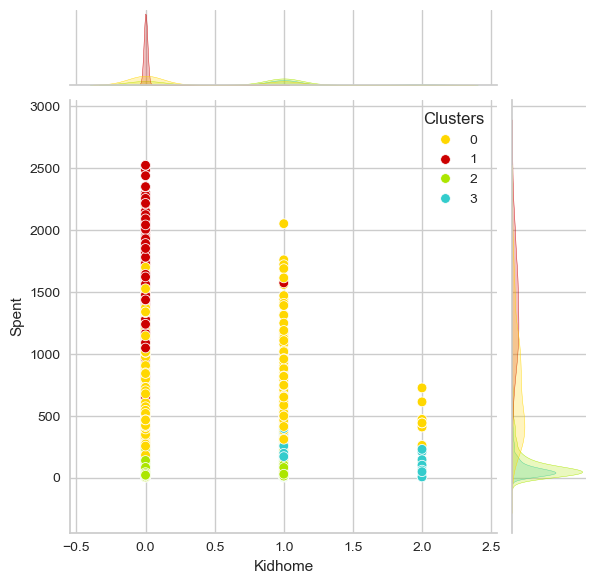

<Figure size 1300x800 with 0 Axes>

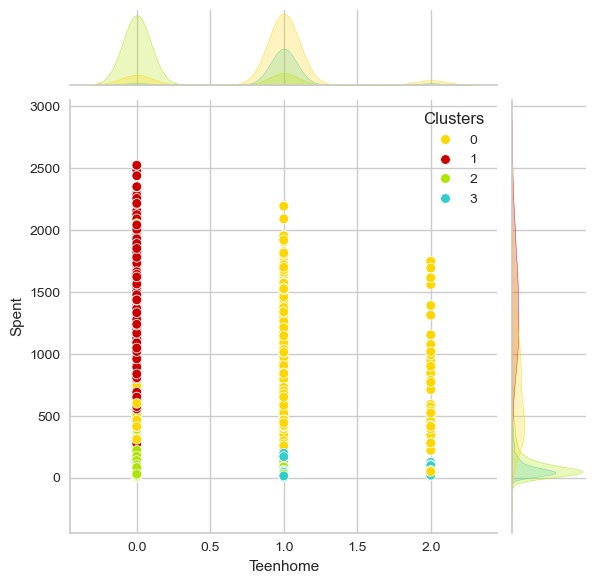

<Figure size 1300x800 with 0 Axes>

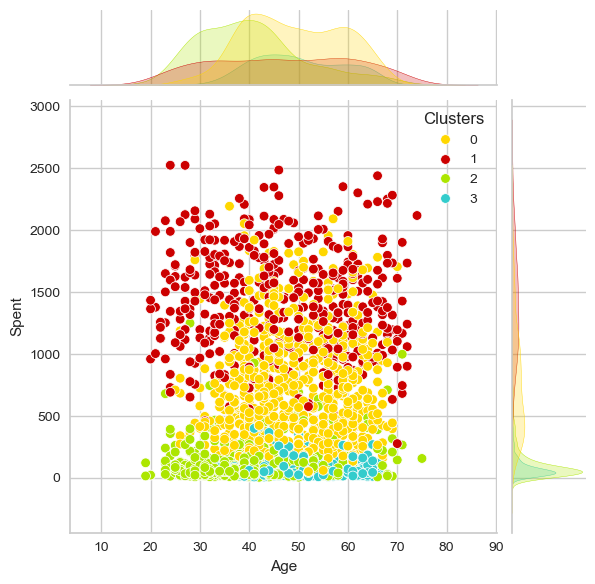

<Figure size 1300x800 with 0 Axes>

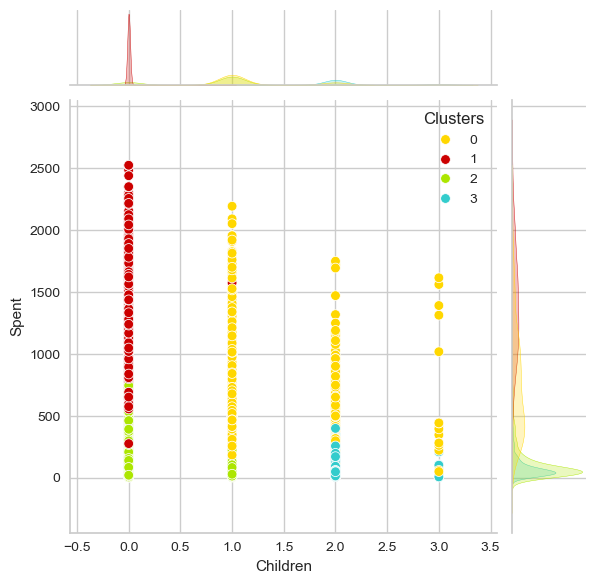

<Figure size 1300x800 with 0 Axes>

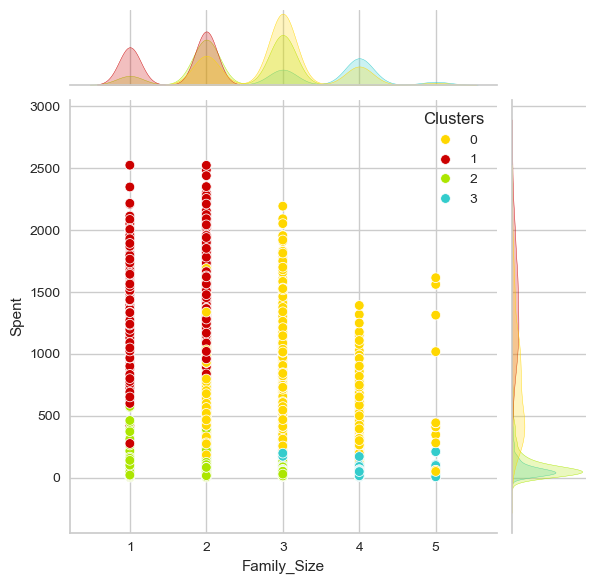

<Figure size 1300x800 with 0 Axes>

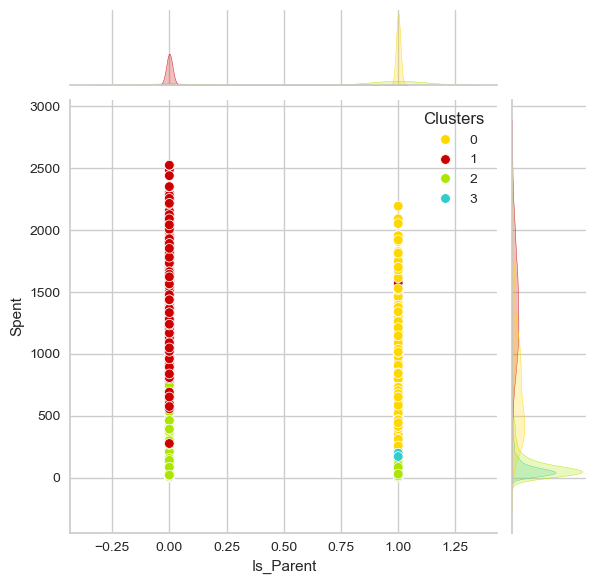

<Figure size 1300x800 with 0 Axes>

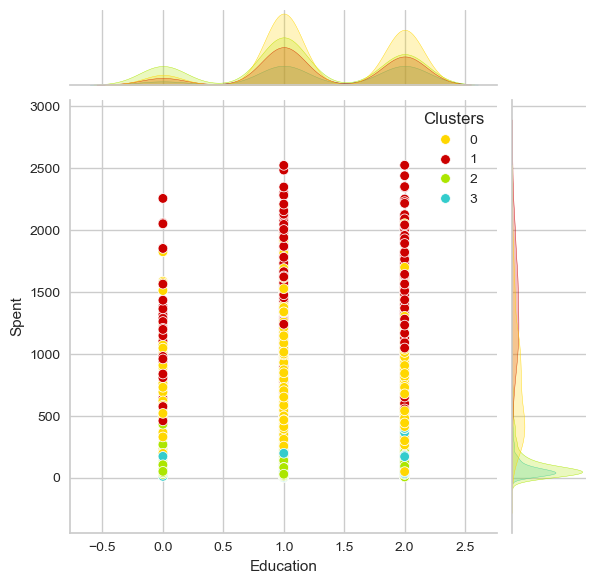

<Figure size 1300x800 with 0 Axes>

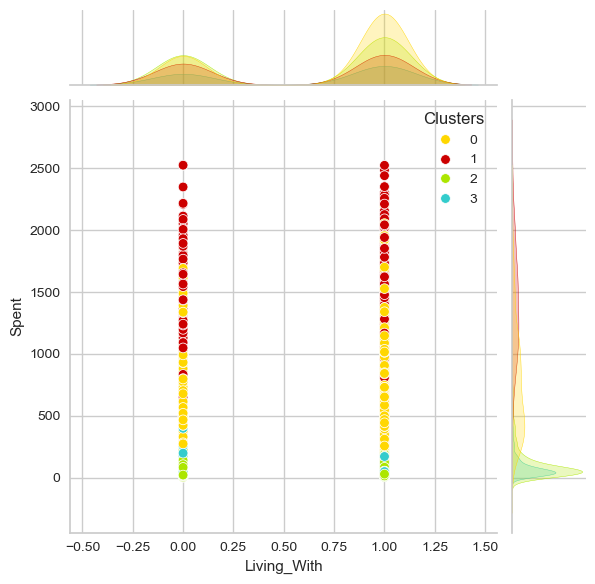

In [187]:
Personal = ['Kidhome', 'Teenhome', 'Age', 'Children', 'Family_Size', 'Is_Parent', 'Education', 'Living_With']

for i in Personal:
    plt.figure(figsize=(13,8))
    sns.jointplot(x=data_old[i], y=data_old['Spent'], hue=data_old['Clusters'], kind='scatter', palette=pal);

# About Cluster 0:

# The majority of these people are parents
# At max have 3 members in the family
# They majorly have one kid and typically not tennagers
# Relatively younger
# About Cluster 1:

# Definitely a parent
# At max have 4 members in the family and at least 2
# Most have a teeanger in home
# Single parents are a subset of this group
# Relatively older
# About Cluster 2:

# Definitely not a parent
# At max are only 2 members in the family.
# A slight majority of couples over single people
# Span all ages
# high income and high spending

#About Cluster 3:

# Definitely a parent
# At max have 5 members in the family and at least 2
# Majority of them have a teenager at home
# Relatively older
# Cluster 0: Younger Families with One Young Child Messaging:

# Emphasize products or services that support early childhood development, parenting hacks, and convenience. Highlight the importance of spending quality time as a small, close-knit family. Channels:

# Social media platforms like Instagram and Facebook, where younger parents are more active. Collaborate with parenting influencers or mommy bloggers. Promotions:

# Bundle deals for family-friendly products (e.g., toys, books, educational apps). Time-sensitive discounts to create urgency for young families who are likely budget-conscious. Content Ideas:

# Share tips on balancing work and parenting for younger parents. Create engaging content like DIY projects or activities for toddlers.

# Cluster 1: Older Parents with Teenagers Messaging:

# Focus on products and services that cater to the needs of teenagers and their parents, such as education, health, and tech gadgets. Address the challenges of parenting teenagers, with content that offers solutions and support. Channels:

# Facebook and LinkedIn, as older parents are more likely to engage here. Email marketing campaigns with personalized content for parents and teens. Promotions:

# Offers on educational tools, extracurricular activities, or family trips. Loyalty programs that reward long-term customers, appealing to the stable, family-oriented nature of this group. Content Ideas:

# Blog posts or webinars on managing teenage behavior or preparing for college. Content that fosters family bonding, like weekend trip ideas or family tech solutions.

# Cluster 2: High-Income, Child-Free Couples and Singles

# Messaging:Emphasize luxury, exclusivity, and experiences over products. Focus on self-care, travel, and lifestyle enhancement.

# Channels:Premium platforms like LinkedIn and Instagram. Targeted ads on luxury websites and magazines. Promotions:

# Exclusive membership offers, luxury product lines, or premium service tiers. Early access to new products or events.

# Content Ideas:Showcase high-end experiences, such as luxury travel, gourmet food, and exclusive events. Highlight testimonials from other high-income customers to build trust.

# Cluster 3: Older Parents with Larger Families Messaging:

# Focus on products and services that cater to the needs of a larger family. Highlight cost savings, family unity, and the importance of quality time. Channels:

# Facebook, where older parents with larger families are more active. Family-oriented community events or local advertising. Promotions:

# Family packs or bulk discounts on essential products. Reward programs for large purchases that cater to bigger families. Content Ideas:

# Content that promotes family activities and togetherness, such as holiday planning or large family meals. Tips for managing busy schedules, budgeting for larger families, or raising multiple children.

# Cross-Cluster Strategies: Seasonal Campaigns: Tailor seasonal campaigns (e.g., back-to-school, holidays) with specific offers for each cluster. Customer Segmentation: Use CRM tools to segment customers into these clusters for personalized communication. Feedback Loops: Regularly gather feedback from each cluster to refine and improve your marketing strategies.